In [1]:
!pip install -U PyMySQL sqlalchemy flask pyngrok geopandas pygeos sodapy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 43 kB 2.1 MB/s 
     |████████████████████████████████| 101 kB 11.2 MB/s 
     |████████████████████████████████| 761 kB 51.5 MB/s 
     |████████████████████████████████| 1.1 MB 53.6 MB/s 
     |████████████████████████████████| 2.2 MB 48.9 MB/s 
     |████████████████████████████████| 232 kB 78.6 MB/s 
     |████████████████████████████████| 133 kB 63.1 MB/s 
     |████████████████████████████████| 96 kB 7.1 MB/s 
     |████████████████████████████████| 7.8 MB 39.4 MB/s 
     |████████████████████████████████| 16.6 MB 60.7 MB/s 
     |████████████████████████████████| 62 kB 1.6 MB/s 
  Created wheel for pyngrok: filename=pyngrok-5.2.1-py3-none-any.whl size=19792 sha256=cd9ffff8f64a31febb76337109d8ae736ebd7d4dc6cf21d78c3d17b9440cd7c6
  Stored in directory: /root/.cache/pip/wheels/5d/f2/70/526da675d32f17577ec47ac4c663084efe39d47c826b6c3bb1
Successfu

In [2]:
import pandas as pd
from sqlalchemy import create_engine
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
from sodapy import Socrata
import numpy as np

/usr/local/lib/python3.8/dist-packages/geopandas/_compat.py:123: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
<ipython-input-2-ea42cda14d2b>:3: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  impo

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
conn_string = 'mysql+pymysql://{user}:{password}@{host}:{port}/{db}?charset={encoding}'.format(
    user='student', 
    password='dwdstudent2015', 
    host = 'db.ipeirotis.org', 
    port=3306, 
    db='public',
    encoding = 'utf8'
)
engine = create_engine(conn_string)

## **NYC Monthly Tonnage Data**

In [5]:
client = Socrata('data.cityofnewyork.us',
                 '7lNEaKU6tflxrc2RGLtO8riHn',
                 username="cv25h2tpnfgm0x6xor5wfx2pt",
                 password="1hdkfdyecseu5ryqf64y0rnkszph7oyf8h0o1zzjw2krtwl73p")


results = client.get("ebb7-mvp5", limit=23000)

# Convert to pandas DataFrame
q5 = pd.DataFrame.from_records(results)

In [6]:
q5 = q5.drop(['communitydistrict','borough_id'], axis=1)
q5.columns = q5.columns.str.upper()

In [7]:
#add year var 
q5['year'] = pd.DatetimeIndex(q5['MONTH']).year
# q5['year'] = pd.DatetimeIndex(q5['MONTH']).year
q5['month'] = pd.DatetimeIndex(q5['MONTH']).month

In [8]:
q5.loc[:,'REFUSETONSCOLLECTED':'XMASTREETONS'] = q5.loc[:,'REFUSETONSCOLLECTED':'XMASTREETONS'].astype(float).round(2)
q5.loc[:, 'REFUSETONSCOLLECTED':'XMASTREETONS'] = q5.loc[:, 'REFUSETONSCOLLECTED':'XMASTREETONS'].fillna(0)

### NYC Yearly Total Waste

In [9]:
totalWaste = q5.loc[:,'REFUSETONSCOLLECTED':'XMASTREETONS'].T.sum()
q5['totalWaste'] = totalWaste

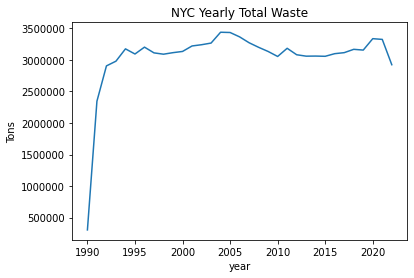

In [10]:
yearly_data = q5.loc[:,'year':'totalWaste']
yearly_data = yearly_data.groupby('year')['totalWaste'].sum()
yearly_data.plot(x ='year', y='totalWaste', kind='line')
plt.ylabel('Tons')
plt.title('NYC Yearly Total Waste')
plt.ticklabel_format(useOffset=False, style='plain')

In [11]:
yearly_data_chart_years = list(yearly_data.index)
yearly_data_chart_values = yearly_data.to_list()

### NYC Yearly Paper Waste

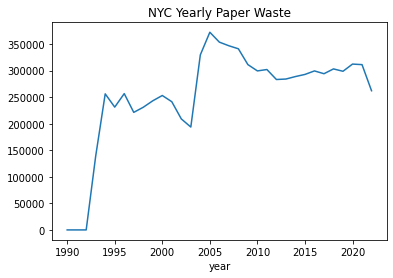

In [12]:
yearly_paper = q5.loc[:, ['PAPERTONSCOLLECTED','year']]
yearly_paper = yearly_paper.groupby('year')['PAPERTONSCOLLECTED'].sum()
yearly_paper.plot(x ='year', y='PAPERTONSCOLLECTED', kind='line')
#plt.ylim(90, 100)
plt.title('NYC Yearly Paper Waste')
plt.ticklabel_format(useOffset=False, style='plain') 

In [13]:
yearly_paper_chart_years = list(yearly_paper.index)
yearly_paper_chart_values = yearly_paper.to_list()

### NYC Yearly Refuse Waste

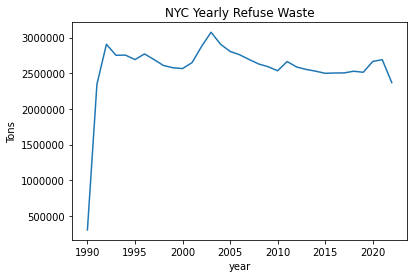

In [14]:
#yearly tons of refuse collected 
yearly_refuse = q5.loc[:,'REFUSETONSCOLLECTED':'year']
yearly_refuse = yearly_refuse.groupby('year')['REFUSETONSCOLLECTED'].sum()
yearly_refuse.plot(x ='year', y='REFUSETONSCOLLECTED', kind='line')
#plt.ylim(90, 100)
plt.ylabel('Tons')
plt.title('NYC Yearly Refuse Waste')
plt.ticklabel_format(useOffset=False, style='plain') 

In [15]:
yearly_refuse_chart_years = list(yearly_refuse.index)
yearly_refuse_chart_values = yearly_refuse.to_list()

### NYC Yearly Metal, Glass, and Plastic Waste

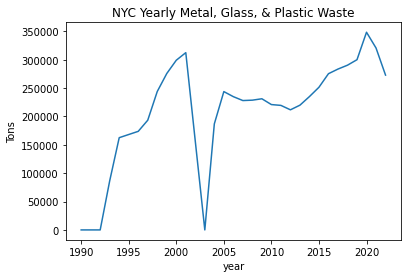

In [16]:
#yearly tons of metal, glass, plastic, & beverage cartons collected 
yearly_mgpt = q5.loc[:,'MGPTONSCOLLECTED':'year']
yearly_mgpt = yearly_mgpt.groupby('year')['MGPTONSCOLLECTED'].sum()
yearly_mgpt.plot(x ='year', y='MGPTONSCOLLECTED', kind='line')
#plt.ylim(90, 100)
plt.ylabel('Tons')
plt.title('NYC Yearly Metal, Glass, & Plastic Waste')
plt.ticklabel_format(useOffset=False, style='plain') 

In [17]:
yearly_mgpt_chart_years = list(yearly_mgpt.index)
yearly_mgpt_chart_values = yearly_mgpt.to_list()

### Fast Facts 2022

In [20]:
import datetime
today = datetime.date.today()
# current_year = int(today.strftime("%Y"))
current_year = 2022
prev_year = current_year - 1

In [22]:
def get_change(current, previous):
    if current == previous:
        return 0
    try:
        return (current - previous) / previous * 100.0
    except ZeroDivisionError:
        return float('inf')

totalWasteCollected2022 = yearly_data[current_year]
percentageChangeWaste = round(get_change(totalWasteCollected2022, yearly_data[prev_year]),2)
totalPaper2022 = yearly_paper[current_year]
percentageChangePaper = round(get_change(totalPaper2022, yearly_paper[prev_year]),2)
totalRefuse2022 = yearly_refuse[current_year]
percentageChangeRefuse = round(get_change(totalRefuse2022, yearly_refuse[prev_year]),2)
totalMGP2022 = yearly_mgpt[current_year]
percentageChangeMGP = round(get_change(totalMGP2022, yearly_mgpt[prev_year]),2)

### NYC Yealy Total Waste Collected in Last 5 Years

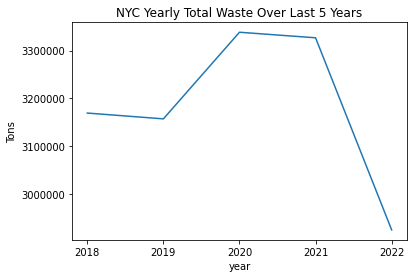

In [23]:
yearly_waste_5 = q5[q5.year>=2018]

#yearly tons of total waste collected 
yearly_waste_5 = yearly_waste_5.loc[:,'year':'totalWaste']
yearly_waste_5 = yearly_waste_5.groupby('year')['totalWaste'].sum()
yearly_waste_5.plot(x = 'year', y='totalWaste', kind='line')
plt.ylabel('Tons')
plt.xticks(np.arange(2018,2023))
plt.title('NYC Yearly Total Waste Over Last 5 Years')
plt.ticklabel_format(useOffset=False, style='plain')

## **Waste Analysis - By Boroughs**

### Yearly Total Waste Collected - by Boroughs

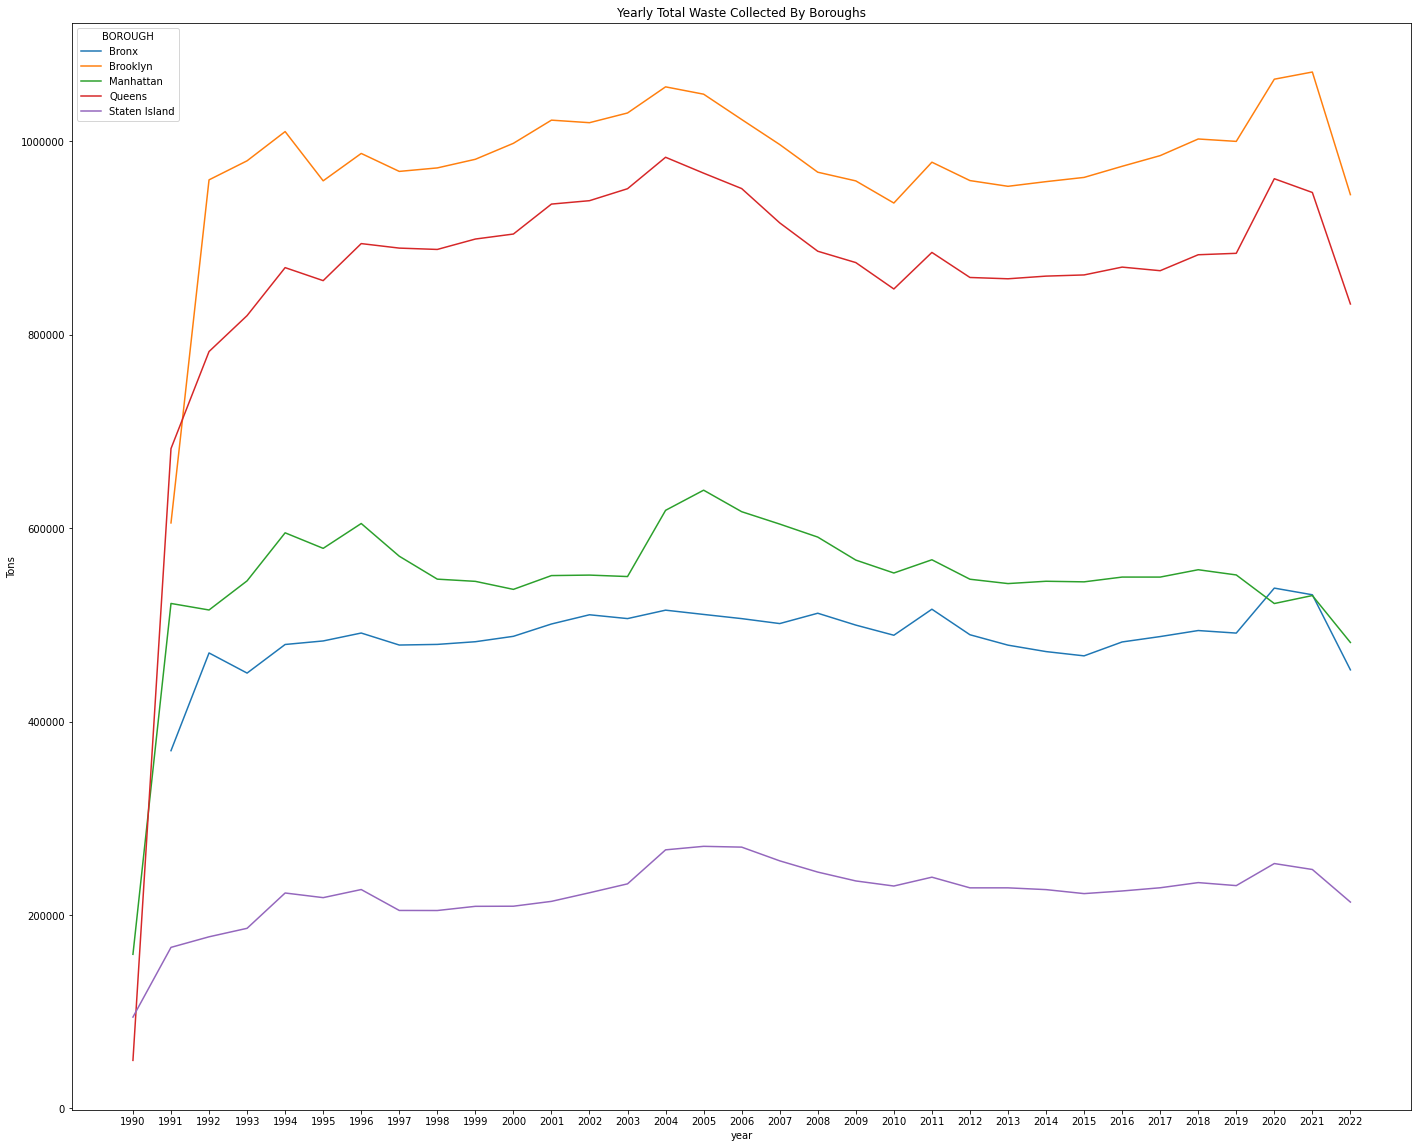

In [24]:
yearly_tonnage_boroughs = q5.groupby(['BOROUGH','year'])['totalWaste'].sum()
# Yearly waste produced by boroughs
yearly_tonnage_boroughs = yearly_tonnage_boroughs.to_frame()
yearly_tonnage_boroughs.pivot_table(
    index='year',
    columns='BOROUGH',
    values='totalWaste',
    aggfunc='sum'
).plot(
    kind='line',
    # subplots=True,
    figsize=(24,20)
)
plt.ylabel('Tons')
plt.title('Yearly Total Waste Collected By Boroughs')
plt.xticks(np.arange(1990,2023))
plt.ticklabel_format(useOffset=False, style='plain')

In [25]:
years_boro_chart = list(yearly_tonnage_boroughs.loc['Bronx'].index)
bronx_total_years = list(yearly_tonnage_boroughs.loc['Bronx'].index)
bronx_values = yearly_tonnage_boroughs.loc['Bronx']['totalWaste'].to_list()
manhattan_total_years = list(yearly_tonnage_boroughs.loc['Manhattan'].index)
manhattan_values = yearly_tonnage_boroughs.loc['Manhattan']['totalWaste'].to_list()
brooklyn_total_years = list(yearly_tonnage_boroughs.loc['Brooklyn'].index)
brooklyn_values = yearly_tonnage_boroughs.loc['Brooklyn']['totalWaste'].to_list()
queens_total_years = list(yearly_tonnage_boroughs.loc['Queens'].index)
queens_values = yearly_tonnage_boroughs.loc['Queens']['totalWaste'].to_list()
staten_total_years = list(yearly_tonnage_boroughs.loc['Staten Island'].index)
staten_values = yearly_tonnage_boroughs.loc['Staten Island']['totalWaste'].to_list()


### Yearly Total Waste Collected by Boroughs - Subplots

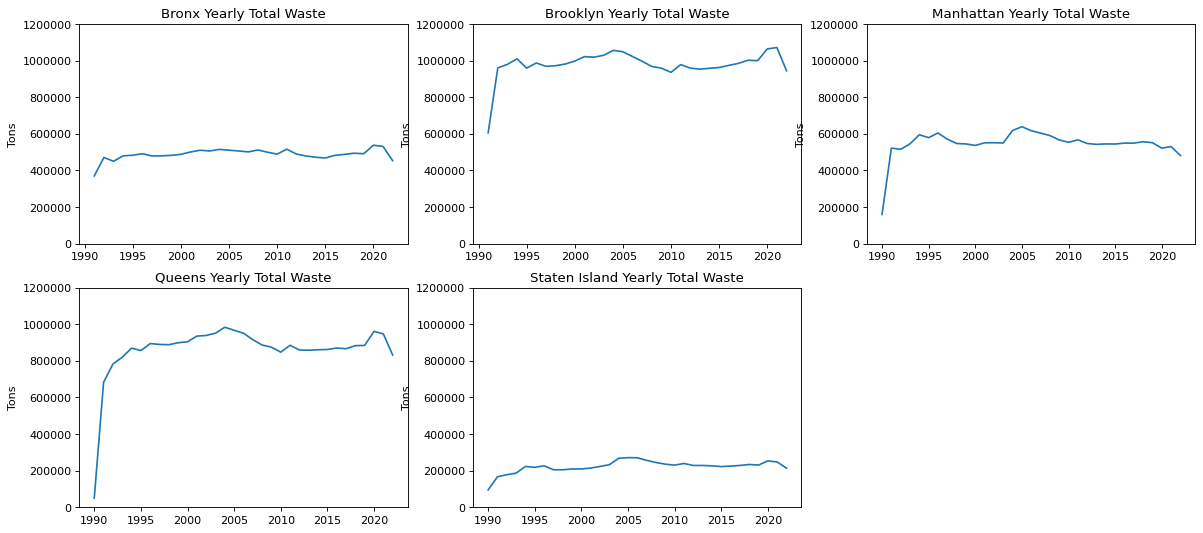

In [26]:
yearly_tonnage_boroughs = q5.groupby(['BOROUGH','year'], as_index=False)['totalWaste'].sum()
plt.figure(figsize=(18, 8), dpi=80) #resize figure

boroughs = ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island']
for i, b in enumerate(boroughs):
  curr = yearly_tonnage_boroughs[yearly_tonnage_boroughs.BOROUGH == b]
  subplot_string = '23' + str(i + 1) #2 rows, 3 columns in total for our subplot, i is index of subplot
  plt.subplot(subplot_string) #create the subplot
  plt.plot(curr['year'].values, curr['totalWaste'].values) #plot values
  plt.ylim(0, 1200000)
  plt.ylabel('Tons')
  title = str(b) + ' Yearly Total Waste' #make title
  plt.title(title)
  plt.ticklabel_format(useOffset=False, style='plain') #prevent scientific notation

### Borough Rankings based on Tonnes of Waste Collected from Each Borough

In [27]:
waste_rating = q5[['totalWaste','BOROUGH']].groupby('BOROUGH').sum()
waste_rating = waste_rating.sort_values(by='totalWaste', ascending=False)
waste_rating

,totalWaste
BOROUGH,
Brooklyn,31329219.98
Queens,28347356.32
Manhattan,18049509.90
Bronx,15629354.62
Staten Island,7336203.44


In [28]:
pie_labels = list(waste_rating.index)
pie_values = waste_rating['totalWaste'].to_list()

In [29]:
pie_dict = { }
for i, boro in enumerate(pie_labels):
  pie_dict[i+1] = boro

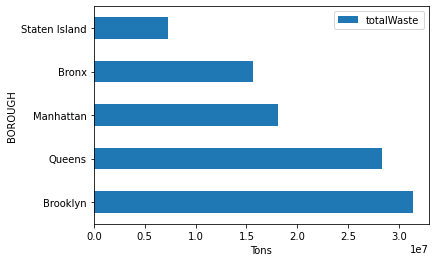

In [30]:
waste_rating.plot(kind='barh')
plt.xlabel('Tons')
plt.ticklabel_format(axis='x', useOffset=False)

### Waste Ratings for 2022

In [31]:
waste_rating2022 = q5.loc[q5.year == current_year]
waste_rating2022 = waste_rating2022[['totalWaste','BOROUGH']].groupby('BOROUGH').sum()
waste_rating2022 = waste_rating2022.sort_values(by='totalWaste', ascending=False)
waste_rating2022

,totalWaste
BOROUGH,
Brooklyn,944680.35
Queens,831634.56
Manhattan,481718.53
Bronx,453417.62
Staten Island,213347.81


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fdb01b86d60>],
      dtype=object)

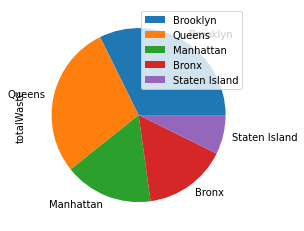

In [32]:
waste_rating2022.plot.pie(subplots=True)

### Yearly Refuse Waste - By Boroughs - Subplots & Rankings

In [33]:
#yearly refuse tons by borough
boro_refuse = q5.groupby(['BOROUGH', 'year'], as_index=False)['REFUSETONSCOLLECTED'].sum()
boro_refuse

,BOROUGH,year,REFUSETONSCOLLECTED
0,Bronx,1991,369867.71
1,Bronx,1992,470892.76
2,Bronx,1993,427840.30
3,Bronx,1994,440798.85
4,Bronx,1995,438483.71
...,...,...,...
158,Staten Island,2018,181960.06
159,Staten Island,2019,180167.77
160,Staten Island,2020,200321.56
161,Staten Island,2021,198177.82


In [34]:
refuse = q5.groupby(['BOROUGH', 'year'])['REFUSETONSCOLLECTED'].sum()
bronx_refuse = refuse['Bronx'].to_list()
bronx_refuse_years = list(refuse['Bronx'].index)
manhattan_refuse = refuse['Manhattan'].to_list()
manhattan_refuse_years = list(refuse['Manhattan'].index)
brooklyn_refuse = refuse['Brooklyn'].to_list()
brooklyn_refuse_years = list(refuse['Brooklyn'].index)
staten_refuse = refuse['Staten Island'].to_list()
staten_refuse_years = list(refuse['Staten Island'].index)
queens_refuse = refuse['Queens'].to_list()
queens_refuse_years = list(refuse['Queens'].index)

In [35]:
# dataframe with descending order by borough on total refuse
refuse_rating = q5[['REFUSETONSCOLLECTED','BOROUGH']].groupby('BOROUGH').sum()
refuse_rating = refuse_rating.sort_values(by='REFUSETONSCOLLECTED', ascending=False)
refuse_rating

,REFUSETONSCOLLECTED
BOROUGH,
Brooklyn,26636612.59
Queens,23564537.46
Manhattan,15073702.15
Bronx,13691482.66
Staten Island,6119371.67


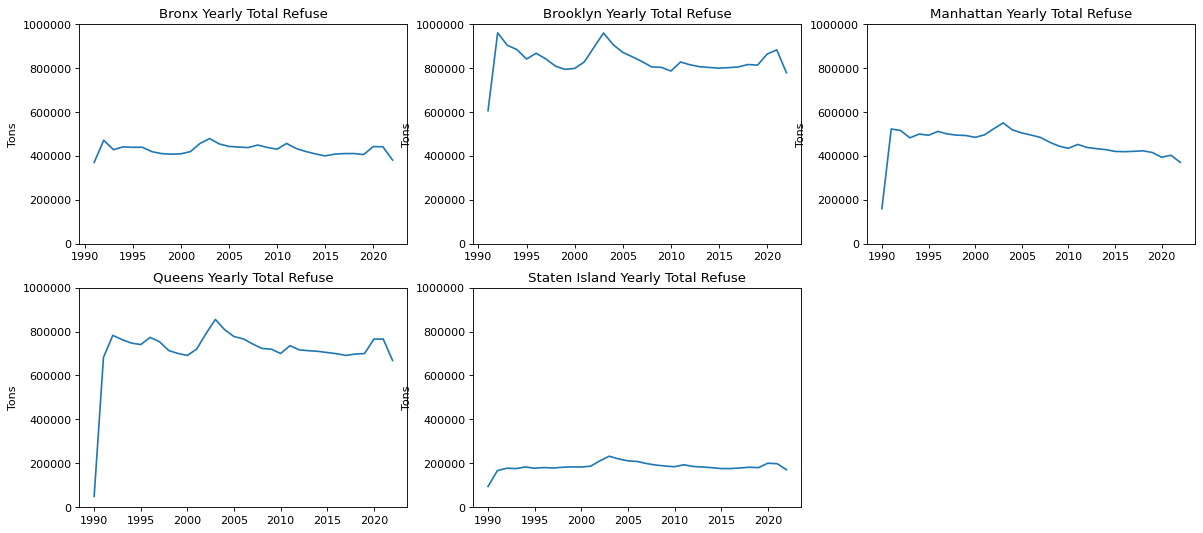

In [36]:
plt.figure(figsize=(18, 8), dpi=80) #resize figure

for i, b in enumerate(boroughs):
  curr = boro_refuse[boro_refuse.BOROUGH == b]
  subplot_string = '23' + str(i + 1) #2 rows, 3 columns in total for our subplot, i is index of subplot
  plt.subplot(subplot_string) #create the subplot
  plt.plot(curr['year'].values, curr['REFUSETONSCOLLECTED'].values) #plot values
  plt.ylim(0, 1000000)
  plt.ylabel('Tons')
  title = str(b) + ' Yearly Total Refuse' #make title
  plt.title(title)
  plt.ticklabel_format(useOffset=False, style='plain') #prevent sci

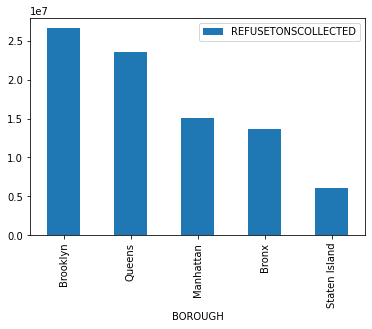

In [37]:
refuse_rating.plot(kind = 'bar')

### Yearly Paper Waste - By Boroughs - Subplots & Rankings

In [38]:
#yearly paper tons by borough
boro_paper = q5.groupby(['BOROUGH', 'year'], as_index=False)['PAPERTONSCOLLECTED'].sum()
boro_paper

,BOROUGH,year,PAPERTONSCOLLECTED
0,Bronx,1991,0.00
1,Bronx,1992,0.00
2,Bronx,1993,12049.53
3,Bronx,1994,20479.84
4,Bronx,1995,23228.58
...,...,...,...
158,Staten Island,2018,23981.65
159,Staten Island,2019,23068.68
160,Staten Island,2020,24388.06
161,Staten Island,2021,23205.35


In [39]:
paper = q5.groupby(['BOROUGH', 'year'])['PAPERTONSCOLLECTED'].sum()
bronx_paper = paper['Bronx'].to_list()
bronx_paper_years = list(paper['Bronx'].index)
manhattan_paper = paper['Manhattan'].to_list()
manhattan_paper_years = list(paper['Manhattan'].index)
brooklyn_paper = paper['Brooklyn'].to_list()
brooklyn_paper_years = list(paper['Brooklyn'].index)
staten_paper = paper['Staten Island'].to_list()
staten_paper_years = list(paper['Staten Island'].index)
queens_paper = paper['Queens'].to_list()
queens_paper_years = list(paper['Queens'].index)

In [40]:
# dataframe with descending order by borough on total paper collected
paper_rating = q5[['PAPERTONSCOLLECTED','BOROUGH']].groupby('BOROUGH').sum()
paper_rating = paper_rating.sort_values(by='PAPERTONSCOLLECTED', ascending=False)
paper_rating

,PAPERTONSCOLLECTED
BOROUGH,
Queens,2600833.35
Brooklyn,2591170.44
Manhattan,1656864.23
Bronx,913700.54
Staten Island,597755.12


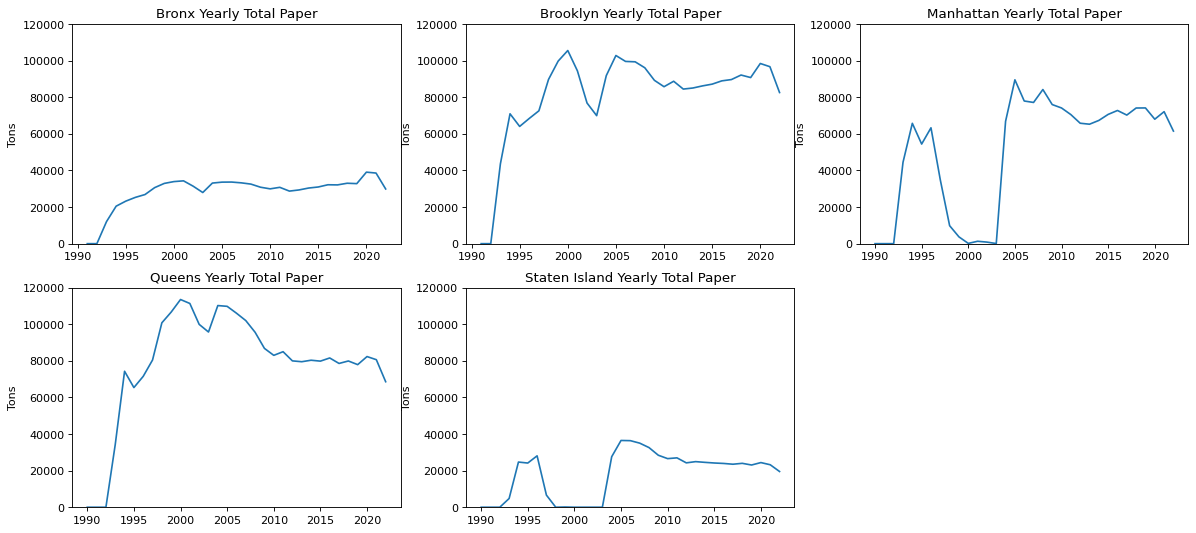

In [41]:
plt.figure(figsize=(18, 8), dpi=80) #resize figure

for i, b in enumerate(boroughs):
  curr = boro_paper[boro_paper.BOROUGH == b]
  subplot_string = '23' + str(i + 1) #2 rows, 3 columns in total for our subplot, i is index of subplot
  plt.subplot(subplot_string) #create the subplot
  plt.plot(curr['year'].values, curr['PAPERTONSCOLLECTED'].values) #plot values
  plt.ylim(0, 120000)
  plt.ylabel('Tons')
  title = str(b) + ' Yearly Total Paper' #make title
  plt.title(title)
  plt.ticklabel_format(useOffset=False, style='plain') #prevent scientific notation

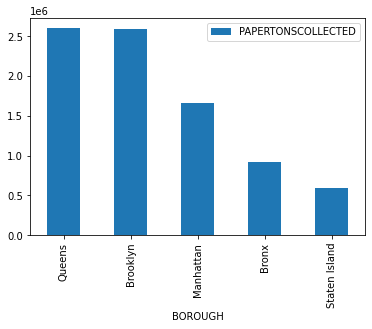

In [42]:
paper_rating.plot(kind = 'bar')

### Yearly Metal, Glass, and Plastic Waste - By Boroughs - Subplots & Rankings

In [43]:
#yearly metal, glass, plastic tons by borough
boro_mgp = q5.groupby(['BOROUGH', 'year'], as_index=False)['MGPTONSCOLLECTED'].sum()
boro_mgp

,BOROUGH,year,MGPTONSCOLLECTED
0,Bronx,1991,0.00
1,Bronx,1992,0.00
2,Bronx,1993,10186.95
3,Bronx,1994,18260.38
4,Bronx,1995,21473.17
...,...,...,...
158,Staten Island,2018,22416.69
159,Staten Island,2019,23078.42
160,Staten Island,2020,27759.90
161,Staten Island,2021,24959.04


In [44]:
mgp = q5.groupby(['BOROUGH', 'year'])['MGPTONSCOLLECTED'].sum()
bronx_mgp = mgp['Bronx'].to_list()
bronx_mgp_years = list(mgp['Bronx'].index)
manhattan_mgp = mgp['Manhattan'].to_list()
manhattan_mgp_years = list(mgp['Manhattan'].index)
brooklyn_mgp = mgp['Brooklyn'].to_list()
brooklyn_mgp_years = list(mgp['Brooklyn'].index)
staten_mgp = mgp['Staten Island'].to_list()
staten_mgp_years = list(mgp['Staten Island'].index)
queens_mgp = mgp['Queens'].to_list()
queens_mgp_years = list(mgp['Queens'].index)

In [45]:
mgp_rating = q5[['MGPTONSCOLLECTED','BOROUGH']].groupby('BOROUGH').sum()
mgp_rating = mgp_rating.sort_values(by='MGPTONSCOLLECTED', ascending=False)
mgp_rating

,MGPTONSCOLLECTED
BOROUGH,
Queens,2041382.12
Brooklyn,2014264.28
Manhattan,1282474.62
Bronx,985960.40
Staten Island,548814.59


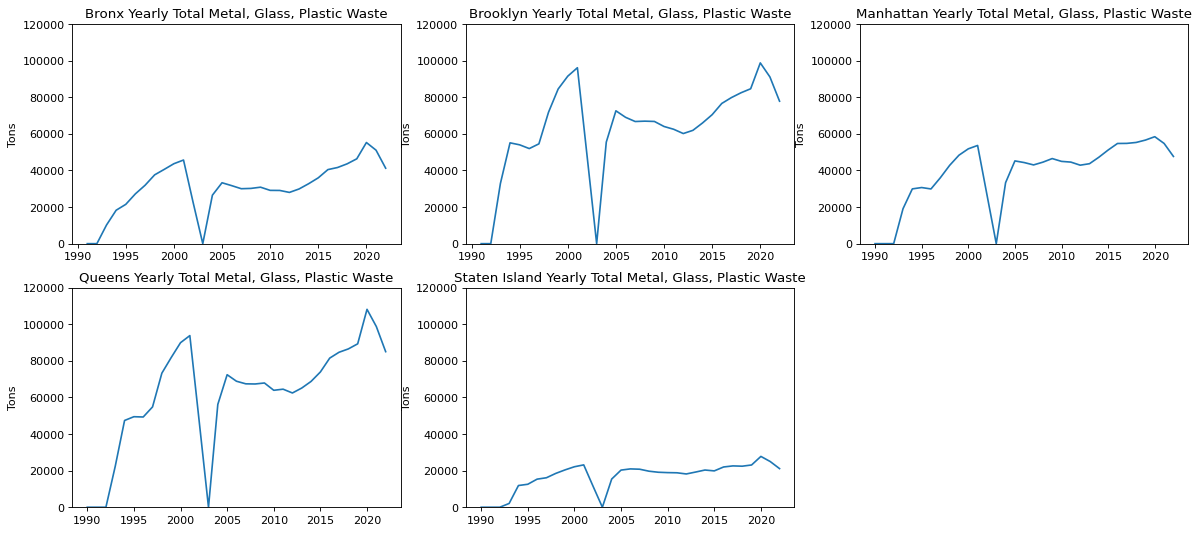

In [46]:
plt.figure(figsize=(18, 8), dpi=80) #resize figure

for i, b in enumerate(boroughs):
  curr = boro_mgp[boro_mgp.BOROUGH == b]
  subplot_string = '23' + str(i + 1) #2 rows, 3 columns in total for our subplot, i is index of subplot
  plt.subplot(subplot_string) #create the subplot
  plt.plot(curr['year'].values, curr['MGPTONSCOLLECTED'].values) #plot values
  plt.ylim(0, 120000)
  plt.ylabel('Tons')
  title = str(b) + ' Yearly Total Metal, Glass, Plastic Waste' #make title
  plt.title(title)
  plt.ticklabel_format(useOffset=False, style='plain') #prevent scientific notation

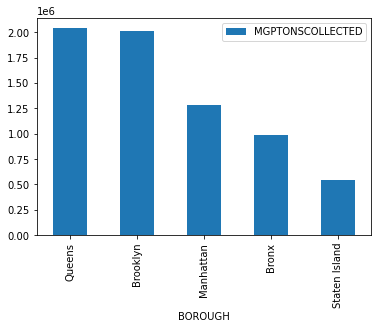

In [47]:
mgp_rating.plot(kind = 'bar')

Monthly Trends for Years in which Max & Min Waste were collected - By Boroughs

In [48]:
# year in which max waste was generated for each borough
yearly_tonnage_boroughs = q5.groupby(['BOROUGH', 'year'])['totalWaste'].sum()
max_waste_year_boroughs = yearly_tonnage_boroughs.groupby(level=0).idxmax()
max_waste_year_boroughs

BOROUGH
Bronx                    (Bronx, 2020)
Brooklyn              (Brooklyn, 2021)
Manhattan            (Manhattan, 2005)
Queens                  (Queens, 2004)
Staten Island    (Staten Island, 2005)
Name: totalWaste, dtype: object

In [49]:
# year in which min waste was generated for each borough
min_waste_year_boroughs = yearly_tonnage_boroughs.groupby(level=0).idxmin()
min_waste_year_boroughs

BOROUGH
Bronx                    (Bronx, 1991)
Brooklyn              (Brooklyn, 1991)
Manhattan            (Manhattan, 1990)
Queens                  (Queens, 1990)
Staten Island    (Staten Island, 1990)
Name: totalWaste, dtype: object

In [50]:
# had to extract month and year to get the monthly trends
monthly_tonnage_boroughs = q5.groupby(['BOROUGH', 'year', 'month'])['totalWaste'].sum()
monthly_tonnage_boroughs =  monthly_tonnage_boroughs.to_frame()
monthly_tonnage_boroughs

totalWaste
BOROUGH       year month            
Bronx         1991 1         5154.80
                   2        14216.20
                   3        15570.20
                   4        18912.80
                   5        40436.30
...                              ...
Staten Island 2022 8        19077.87
                   9        18938.17
                   10       18599.59
                   11       19425.52
                   12        4860.76

[1938 rows x 1 columns]

#### Bronx

In [51]:
bronx_max_waste = monthly_tonnage_boroughs.loc['Bronx'].loc[max_waste_year_boroughs["Bronx"][1]]
bronx_min_waste = monthly_tonnage_boroughs.loc['Bronx'].loc[min_waste_year_boroughs['Bronx'][1]]

<Figure size 720x720 with 0 Axes>

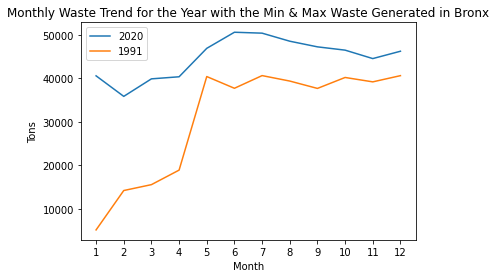

<Figure size 720x720 with 0 Axes>

In [52]:
bronx_merged = bronx_max_waste.merge(
    bronx_min_waste,
    on = 'month'
)
bronx_merged = bronx_merged.rename(columns={'totalWaste_x':f"{max_waste_year_boroughs['Bronx'][1]}",'totalWaste_y':f"{min_waste_year_boroughs['Bronx'][1]}"})
bronx_merged.plot()
plt.ylabel('Tons')
plt.xlabel('Month')
plt.title("Monthly Waste Trend for the Year with the Min & Max Waste Generated in Bronx")
plt.ticklabel_format(useOffset=False, style='plain') 
plt.xticks(np.arange(1,13))
plt.figure(figsize=(10,10))

#### Manhattan

<Figure size 720x720 with 0 Axes>

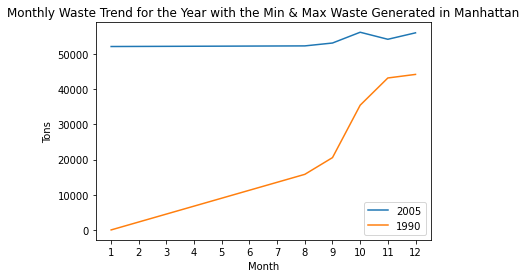

<Figure size 720x720 with 0 Axes>

In [53]:
manhattan_max_waste = monthly_tonnage_boroughs.loc['Manhattan'].loc[max_waste_year_boroughs['Manhattan'][1]]
manhattan_min_waste = monthly_tonnage_boroughs.loc['Manhattan'].loc[min_waste_year_boroughs['Manhattan'][1]]
manhattan_merged = manhattan_max_waste.merge(
    manhattan_min_waste,
    on = 'month'
)
manhattan_merged = manhattan_merged.rename(columns={'totalWaste_x':f"{max_waste_year_boroughs['Manhattan'][1]}",'totalWaste_y':f"{min_waste_year_boroughs['Manhattan'][1]}"})
manhattan_merged.plot()
plt.ylabel('Tons')
plt.xlabel('Month')
plt.title("Monthly Waste Trend for the Year with the Min & Max Waste Generated in Manhattan")
plt.ticklabel_format(useOffset=False, style='plain') 
plt.xticks(np.arange(1,13))
plt.figure(figsize=(10,10))

#### Brooklyn

<Figure size 720x720 with 0 Axes>

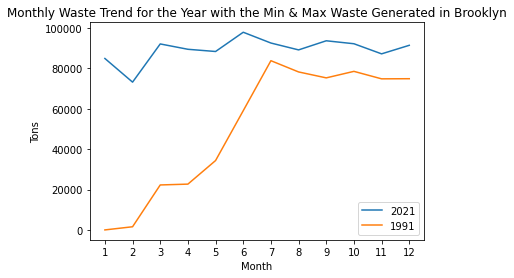

<Figure size 720x720 with 0 Axes>

In [54]:
brooklyn_max_waste = monthly_tonnage_boroughs.loc['Brooklyn'].loc[max_waste_year_boroughs['Brooklyn'][1]]
brooklyn_min_waste = monthly_tonnage_boroughs.loc['Brooklyn'].loc[min_waste_year_boroughs['Brooklyn'][1]]
brooklyn_merged = brooklyn_max_waste.merge(
    brooklyn_min_waste,
    on = 'month'
)
brooklyn_merged = brooklyn_merged.rename(columns={'totalWaste_x':f"{max_waste_year_boroughs['Brooklyn'][1]}",'totalWaste_y':f"{min_waste_year_boroughs['Brooklyn'][1]}"})
brooklyn_merged.plot()
plt.ylabel('Tons')
plt.xlabel('Month')
plt.title("Monthly Waste Trend for the Year with the Min & Max Waste Generated in Brooklyn")
plt.ticklabel_format(useOffset=False, style='plain') 
plt.xticks(np.arange(1,13))
plt.figure(figsize=(10,10))

#### Queens

<Figure size 720x720 with 0 Axes>

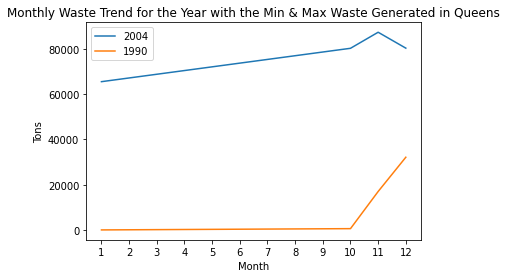

<Figure size 720x720 with 0 Axes>

In [55]:
queens_max_waste = monthly_tonnage_boroughs.loc['Queens'].loc[max_waste_year_boroughs['Queens'][1]]
queens_min_waste = monthly_tonnage_boroughs.loc['Queens'].loc[min_waste_year_boroughs['Queens'][1]]
queens_merged = queens_max_waste.merge(
    queens_min_waste,
    on = 'month'
)
queens_merged = queens_merged.rename(columns={'totalWaste_x':f"{max_waste_year_boroughs['Queens'][1]}",'totalWaste_y':f"{min_waste_year_boroughs['Queens'][1]}"})
queens_merged.plot()
plt.ylabel('Tons')
plt.xlabel('Month')
plt.title("Monthly Waste Trend for the Year with the Min & Max Waste Generated in Queens")
plt.ticklabel_format(useOffset=False, style='plain') 
plt.xticks(np.arange(1,13))
plt.figure(figsize=(10,10))

#### Staten Island

<Figure size 720x720 with 0 Axes>

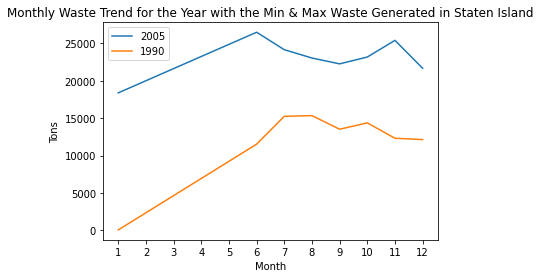

<Figure size 720x720 with 0 Axes>

In [56]:
staten_max_waste = monthly_tonnage_boroughs.loc['Staten Island'].loc[max_waste_year_boroughs['Staten Island'][1]]
staten_min_waste = monthly_tonnage_boroughs.loc['Staten Island'].loc[min_waste_year_boroughs['Staten Island'][1]]
staten_merged = staten_max_waste.merge(
    staten_min_waste,
    on = 'month'
)
staten_merged = staten_merged.rename(columns={'totalWaste_x':f"{max_waste_year_boroughs['Staten Island'][1]}",'totalWaste_y':f"{min_waste_year_boroughs['Staten Island'][1]}"})
staten_merged.plot()
plt.ylabel('Tons')
plt.xlabel('Month')
plt.title("Monthly Waste Trend for the Year with the Min & Max Waste Generated in Staten Island")
plt.ticklabel_format(useOffset=False, style='plain') 
plt.xticks(np.arange(1,13))
plt.figure(figsize=(10,10))

## Recycling Dataset

In [57]:
client = Socrata('data.cityofnewyork.us',
                 '7lNEaKU6tflxrc2RGLtO8riHn',
                 username="cv25h2tpnfgm0x6xor5wfx2pt",
                 password="1hdkfdyecseu5ryqf64y0rnkszph7oyf8h0o1zzjw2krtwl73p")

results = client.get("gaq9-z3hz", limit=3000)

# Convert to pandas DataFrame
q6 = pd.DataFrame.from_records(results)

In [58]:
q6.drop(['district','capture_rate_paper_total_paper_max_paper_', 'capture_rate_mgp_total_mgp_max_mgp_','capture_rate_total_total_recycling_leaves_recycling_max_paper_max_mgp_x100'], axis=1, inplace=True)

In [59]:
q6['diversion_rate_total_total_recycling_total_waste_'] = round(q6['diversion_rate_total_total_recycling_total_waste_'].astype(float),2)

In [60]:
q6['Borough'] = q6['_zone'].replace({'Brooklyn North': 'Brooklyn', 'Brooklyn South': 'Brooklyn', 'Queens East': 'Queens', 'Queens West': 'Queens'})
recycling = q6.groupby(['Borough', 'fiscal_year'])['diversion_rate_total_total_recycling_total_waste_'].mean()
bronx_recycling = recycling['Bronx'].to_list()
brooklyn_recycling = recycling['Brooklyn'].to_list()
manhattan_recycling = recycling['Manhattan'].to_list()
queens_recycling = recycling['Queens'].to_list()
staten_recycling = recycling['Staten Island'].to_list()
recycling_years = list(recycling['Bronx'].index)


Text(0.5, 1.0, 'Diversion Rates in % by Borough')

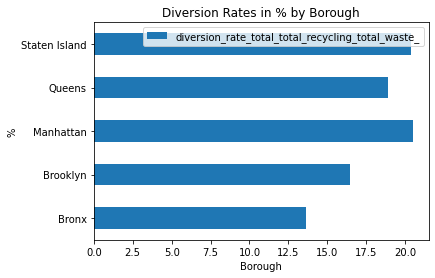

In [61]:
q6[['Borough','diversion_rate_total_total_recycling_total_waste_']].groupby('Borough').mean().plot(kind = 'barh')
plt.ylabel('%')
plt.xlabel('Borough')
plt.title("Diversion Rates in % by Borough")

In [62]:
recycling_yearly_trends = q6[['fiscal_year', 'diversion_rate_total_total_recycling_total_waste_']].groupby('fiscal_year')['diversion_rate_total_total_recycling_total_waste_'].mean()
recycling_yearly_trends

fiscal_year
2016    16.743630
2017    17.319661
2018    17.852853
2019    18.019647
Name: diversion_rate_total_total_recycling_total_waste_, dtype: float64

## Scorecard Ratings Dataset

In [63]:
client = Socrata('data.cityofnewyork.us',
                 '7lNEaKU6tflxrc2RGLtO8riHn',
                 username="cv25h2tpnfgm0x6xor5wfx2pt",
                 password="1hdkfdyecseu5ryqf64y0rnkszph7oyf8h0o1zzjw2krtwl73p")

results = client.get("rqhp-hivt", limit=46000)

# Convert to pandas DataFrame
q7 = pd.DataFrame.from_records(results)
q7['year'] = pd.DatetimeIndex(q7['month']).year 
q7 = q7[['month', 'borough', 'acceptable_streets_feb_2014', 'year']]
q7.columns = ['Month', 'Borough', 'Acceptable Streets %', 'year']

In [64]:
q7['Acceptable Streets %'] = q7['Acceptable Streets %'].astype(float)

### Street Cleanliness Ratings


#### Yearly Acceptable Streets - NYC as a Whole

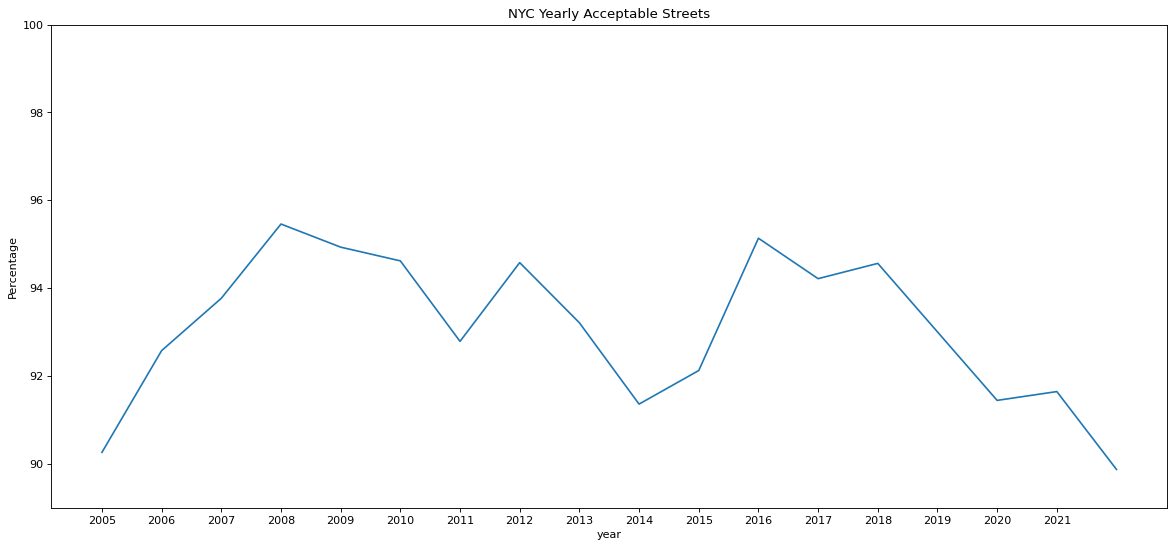

In [65]:
#yearly acceptable streets 
plt.figure(figsize=(18, 8), dpi=80)
yearly_street = q7.loc[:,['Acceptable Streets %','year']]
yearly_street = yearly_street.groupby('year')['Acceptable Streets %'].mean()
yearly_street.plot(x ='year', y='Acceptable Streets %', kind='line')
plt.ylim(89, 100)
plt.ylabel('Percentage')
plt.title('NYC Yearly Acceptable Streets')
plt.xticks(np.arange(2005,2022))
plt.ticklabel_format(useOffset=False, style='plain')


#### Yearly Acceptable Streets - By Boroughs

In [66]:
#yearly acceptable streets by borough
boro_street = q7.groupby(['Borough', 'year'], as_index=False)['Acceptable Streets %'].mean()
boro_street

,Borough,year,Acceptable Streets %
0,Bronx,2005,89.683939
1,Bronx,2006,91.665152
2,Bronx,2007,92.876919
3,Bronx,2008,94.882146
4,Bronx,2009,93.992323
...,...,...,...
80,Staten Island,2017,98.623385
81,Staten Island,2018,98.414813
82,Staten Island,2020,98.642667
83,Staten Island,2021,98.384083


In [67]:
street = q7.groupby(['Borough', 'year'])['Acceptable Streets %'].mean()
bronx_street = street['Bronx'].to_list()
manhattan_street = street['Manhattan'].to_list()
brooklyn_street = street['Brooklyn'].to_list()
staten_street = street['Staten Island'].to_list()
queens_street = street['Queens'].to_list()

In [68]:
street_years = list(street['Brooklyn'].index)

In [69]:
street_cleanliness_rating = q7[['Acceptable Streets %','Borough']].groupby('Borough').mean()
street_cleanliness_rating = street_cleanliness_rating.sort_values(by='Acceptable Streets %', ascending=False)
street_cleanliness_rating

,Acceptable Streets %
Borough,
Staten Island,98.147252
Queens,95.262925
Manhattan,93.352793
Bronx,92.259512
Brooklyn,90.846120


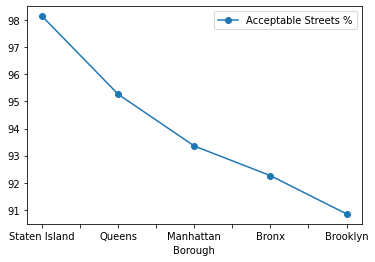

In [70]:
street_cleanliness_rating.plot(kind = 'line', marker = 'o')

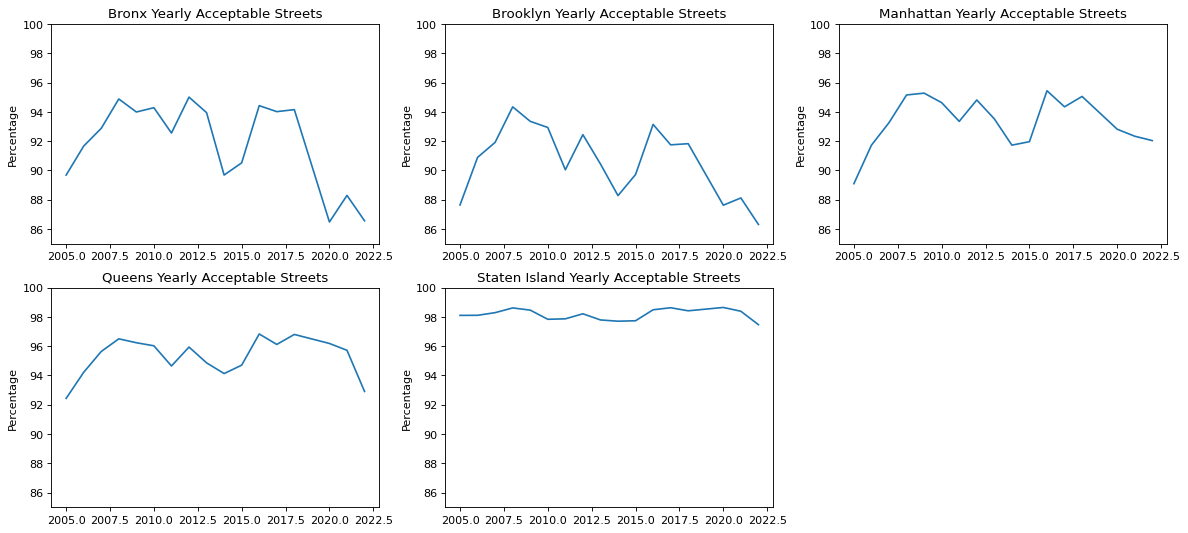

In [71]:
plt.figure(figsize=(18, 8), dpi=80) #resize figure

for i, b in enumerate(boroughs):
  curr = boro_street[boro_street.Borough == b]
  subplot_string = '23' + str(i + 1) #2 rows, 3 columns in total for our subplot, i is index of subplot
  plt.subplot(subplot_string) #create the subplot
  plt.plot(curr['year'].values, curr['Acceptable Streets %'].values) #plot values
  plt.ylim(85, 100)
  plt.ylabel('Percentage')
  title = str(b) + ' Yearly Acceptable Streets' #make title
  plt.title(title)
  plt.ticklabel_format(useOffset=False, style='plain') #prevent scientific notation

## Generating NYC Map

In [72]:
!apt-get -qq install -y  libgeos-dev libproj-dev proj-data proj-bin libgdal-dev libspatialindex-dev 
!pip install -q -U shapely rtree pygeos
!pip install -q geopandas descartes

import geopandas as gpd

# Dataset from NYC Open Data: https://data.cityofnewyork.us/City-Government/Neighborhood-Tabulation-Areas/cpf4-rkhq
df_nyc = gpd.GeoDataFrame.from_file('https://data.cityofnewyork.us/api/geospatial/cpf4-rkhq?method=export&format=Shapefile')

Selecting previously unselected package libspatialindex4v5:amd64.
(Reading database ... 124016 files and directories currently installed.)
Preparing to unpack .../libspatialindex4v5_1.8.5-5_amd64.deb ...
Unpacking libspatialindex4v5:amd64 (1.8.5-5) ...
Selecting previously unselected package libspatialindex-c4v5:amd64.
Preparing to unpack .../libspatialindex-c4v5_1.8.5-5_amd64.deb ...
Unpacking libspatialindex-c4v5:amd64 (1.8.5-5) ...
Selecting previously unselected package libspatialindex-dev:amd64.
Preparing to unpack .../libspatialindex-dev_1.8.5-5_amd64.deb ...
Unpacking libspatialindex-dev:amd64 (1.8.5-5) ...
Selecting previously unselected package proj-bin.
Preparing to unpack .../proj-bin_4.9.3-2_amd64.deb ...
Unpacking proj-bin (4.9.3-2) ...
Setting up libspatialindex4v5:amd64 (1.8.5-5) ...
Setting up libspatialindex-c4v5:amd64 (1.8.5-5) ...
Setting up proj-bin (4.9.3-2) ...
Setting up libspatialindex-dev:amd64 (1.8.5-5) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...

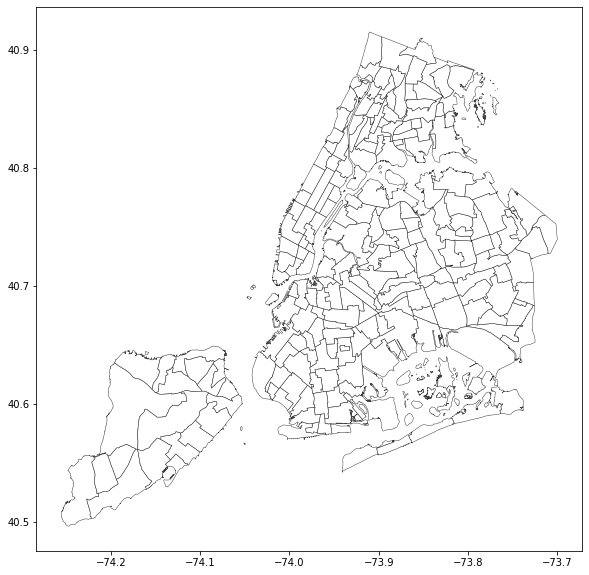

In [73]:
df_nyc.plot(
    linewidth=0.5,
    color='White',
    edgecolor='Black',
    figsize=(10, 10),
    alpha=0.75
)

## Flask Server

In [74]:
import os
import threading
from flask import Flask, render_template, jsonify, request
from pyngrok import ngrok
import base64
from io import BytesIO
import matplotlib.pyplot as plt
import geopandas as gpd

os.environ["FLASK_DEBUG"] = "true"
app = Flask(__name__, template_folder = '/content/drive/MyDrive/Projects in Programming & DS/Final Project/templates', static_folder = '/content/drive/MyDrive/Projects in Programming & DS/Final Project/templates')
port = 5000

In [75]:
os.system("kill -9 $(pgrep ngrok)")
ngrok_authtoken = '2GjfRSRldgBDhUP2qnFZTaYce59_5JgCjrZXvMS7UXJJqu96p'
ngrok.set_auth_token(ngrok_authtoken)
public_url = ngrok.connect(port).public_url
# Update any base URLs to use the public ngrok URL
app.config["BASE_URL"] = public_url
print(f" * ngrok tunnel '{public_url}' -> 'http://127.0.0.1:{port}'")

 * ngrok tunnel 'http://2b4f-35-245-215-87.ngrok.io' -> 'http://127.0.0.1:5000'


In [76]:
@app.route('/',  methods=['GET'])
def index():
    return render_template("homepage.html")

In [77]:
@app.route('/nycwaste', methods=['GET'])
def nyc():
  return render_template("nycwaste.html", 
                         totalWasteCollected2022=totalWasteCollected2022,
                         totalPaper2022=totalPaper2022,
                         totalRefuse2022=totalRefuse2022,
                         totalMGP2022 = totalMGP2022,
                         percentageChangeWaste=percentageChangeWaste,
                         percentageChangePaper=percentageChangePaper,
                         percentageChangeRefuse=percentageChangeRefuse,
                         percentageChangeMGP=percentageChangeMGP,
                         yearly_data_chart_years=yearly_data_chart_years,
                         yearly_data_chart_values=yearly_data_chart_values,
                         yearly_paper_chart_years=yearly_paper_chart_years,
                         yearly_paper_chart_values=yearly_paper_chart_values,
                         yearly_mgp_chart_years=yearly_mgpt_chart_years,
                         yearly_mgp_chart_values=yearly_mgpt_chart_values,
                         yearly_refuse_chart_years=yearly_refuse_chart_years,
                         yearly_refuse_chart_values=yearly_refuse_chart_values,
                         years_boro_chart=years_boro_chart,
                         bronx_values = bronx_values,
                         manhattan_values = manhattan_values,
                         queens_values = queens_values,
                         staten_values = staten_values,
                         brooklyn_values = brooklyn_values,
                         pie_values = pie_values,
                         pie_labels = pie_labels,
                         current_year = current_year,
                         pie_dict = pie_dict)

In [78]:
@app.route('/boro', methods=['GET'])
def boro():
  return render_template("boro.html")

In [79]:
@app.route('/bronx', methods=['GET'])
def bronx():
  return render_template("bronx.html",
                         bronx_total_years=bronx_total_years,
                         bronx_values=bronx_values,
                         bronx_paper=bronx_paper,
                         bronx_refuse=bronx_refuse,
                         bronx_mgp=bronx_mgp,
                         bronx_street=bronx_street,
                         street_years=street_years,
                         recycling_years=recycling_years,
                         bronx_recycling=bronx_recycling,
                         bronx_refuse_years=bronx_refuse_years,
                         bronx_paper_years=bronx_paper_years,
                         bronx_mgp_years=bronx_mgp_years
                         )

In [80]:
@app.route('/brooklyn', methods=['GET'])
def brooklyn():
  return render_template("brooklyn.html",
                         brooklyn_total_years=brooklyn_total_years,
                         brooklyn_values=brooklyn_values,
                         brooklyn_paper=brooklyn_paper,
                         brooklyn_refuse=brooklyn_refuse,
                         brooklyn_mgp=brooklyn_mgp,
                         brooklyn_street=brooklyn_street,
                         street_years=street_years,
                         recycling_years=recycling_years,
                         brooklyn_recycling=brooklyn_recycling,
                         brooklyn_refuse_years=brooklyn_refuse_years,
                         brooklyn_paper_years=brooklyn_paper_years,
                         brooklyn_mgp_years=brooklyn_mgp_years
                         )

In [81]:
@app.route('/manhattan', methods=['GET'])
def manhattan():
  return render_template("manhattan.html",
                         manhattan_total_years=manhattan_total_years,
                         manhattan_values=manhattan_values,
                         manhattan_paper=manhattan_paper,
                         manhattan_refuse=manhattan_refuse,
                         manhattan_refuse_years=manhattan_refuse_years,
                         manhattan_mgp=manhattan_mgp,
                         manhattan_street=manhattan_street,
                         street_years=street_years,
                         recycling_years=recycling_years,
                         manhattan_recycling=manhattan_recycling,
                         manhattan_paper_years=manhattan_paper_years,
                         manhattan_mgp_years=manhattan_mgp_years
                         )

In [82]:
@app.route('/queens', methods=['GET'])
def queens():
  return render_template("queens.html",
                         queens_total_years=queens_total_years,
                         queens_values=queens_values,
                         queens_paper=queens_paper,
                         queens_refuse=queens_refuse,
                         queens_mgp=queens_mgp,
                         queens_street=queens_street,
                         street_years=street_years,
                         recycling_years=recycling_years,
                         queens_recycling=queens_recycling,
                         queens_refuse_years=queens_refuse_years,
                         queens_paper_years=queens_paper_years,
                         queens_mgp_years=queens_mgp_years
                         )

In [83]:
@app.route('/staten', methods=['GET'])
def staten():
  return render_template("staten.html",
                         staten_total_years=staten_total_years,
                         staten_values=staten_values,
                         staten_paper=staten_paper,
                         staten_refuse=staten_refuse,
                         staten_mgp=staten_mgp,
                         staten_street=staten_street,
                         street_years=street_years,
                         recycling_years=recycling_years,
                         staten_recycling=staten_recycling,
                         staten_refuse_years=staten_refuse_years,
                         staten_paper_years=staten_paper_years,
                         staten_mgp_years=staten_mgp_years
                         )

In [84]:
@app.route('/list_dropoffs',  methods=['GET'])
def list_dropoffs():
  return render_template("list_dropoffs.html")  

In [85]:
# This is a function that connects to the database and returns back a 
# list of food dropoffs. It has an optional paramter "search_name"
# which will limit the number of dropoffs that are returned.
#
# We also have the start/limit parameters that limit the number of 
# returned dropoffs
def get_dropoffs(search_name=None, type_name = None, start=0, limit=1000):
  if type_name == "food":
    sql = "SELECT Borough AS borough, NTAName AS name, SiteAddr AS address, Open_Month AS open_month, Day_Hours AS hours, Notes AS notes, Latitude AS lat, Longitude AS lon FROM public.teamH_food"
  elif type_name == "electronics":
    sql = "SELECT Borough AS borough, NTAName AS name, SiteAddr AS address, Latitude AS lat, Longitude AS lon FROM public.teamH_electronics"
  elif type_name == "special_waste":
    sql = "SELECT borough, NAME AS name, ADDRESS AS address, POINT as point FROM public.teamH_special_waste"
  # If we have a search query, we add a condition in SQL
  if search_name and type_name and type_name != 'special_waste':
    sql += " WHERE SiteAddr LIKE %(dropoff_name_query)s OR Borough LIKE %(dropoff_name_query)s"
  if search_name and type_name == "special_waste":
    sql += " WHERE ADDRESS LIKE %(dropoff_name_query)s OR borough LIKE %(dropoff_name_query)s"
  with engine.connect() as con:
    # If there is a search query, we populate the parameter in SQL
    # Since we want to have an approximate query uisng LIKE, 
    # we put the wildcard character before and after the search string 
    if search_name and type_name: 
      params = {"dropoff_name_query": '%'+search_name+'%',"dropoff_type_query": '%'+type_name+'%'}
      dropoffs = pd.read_sql(sql, con=con, params=params)
    if type_name and not search_name:
      params = {"dropoff_type_query": '%'+type_name+'%'}
      dropoffs = pd.read_sql(sql, con=con, params = params)
    if type_name == 'food':
      dropoffs['borough'] = dropoffs['borough'].replace({'Kings': 'Brooklyn', 'Richmond': 'Staten Island', 'New York': 'Manhattan'})
    elif type_name == 'electronics':
      dropoffs['borough'] = dropoffs['borough'].replace({'MANHATTAN': 'Manhattan', 'STATEN IS': 'Staten Island','QUEENS':'Queens','BROOKLYN':'Brooklyn','BRONX':'Bronx'})
    elif type_name == 'special_waste':
      dropoffs['name'] = dropoffs['name'].replace({'MN Drop-Off': 'MN Special Waste Drop-Off', 'QN Drop-Off': 'QN Special Waste Drop-Off','SI Drop-Off': 'SI Special Waste Drop-Off','BX Drop-Off': 'BX Special Waste Drop-Off','BK Drop-Off': 'BK Special Waste Drop-Off'})
    dropoffs = dropoffs[~dropoffs['borough'].isnull()]  
  return dropoffs

In [86]:
# This is the API call that returns back a list of the food dropoffs
# Optionally we pass a query parameter call "name" which we then use to 
# search for food dropoffs that contain that string in their name

@app.route('/dropoff_list_api')
def find_dropoffs():
  type_query = request.args.get('dropoff_type_query')
  search_query = request.args.get('dropoff_name_query')

  dropoffs = get_dropoffs(type_name = type_query, search_name = search_query)

  # Convert the returned dataframe into a list of dictionaries
  list_of_dropoffs = dropoffs.to_dict(orient='records')
  api_results = {"dropoffs": list_of_dropoffs,"type_query": type_query, "search_query": search_query}

  # We JSON-ify our dictionary and return it as the API response
  return jsonify(api_results)

In [87]:
def create_dropoff_map_image(dropoffs):

  fig, ax = plt.subplots(figsize=(7, 5))

  # Create the map of NYC neighborhoods
  nyc_map = df_nyc.plot(linewidth=0.1, color='White', edgecolor='Gray', ax = ax)

  # Plot the matching dropoffs
  ax = dropoffs.plot(kind='scatter', x='lon', y='lat', s=3, ax=nyc_map)

  buf = BytesIO()
  fig.savefig(buf, format="png")
  b64encoded = base64.b64encode(buf.getbuffer())
  # Embed the result in the html output.
  image_data = b64encoded.decode("ascii")

  return image_data

In [88]:
# This API call returns a plot, in JSON format
# Specifically, this returns a map of NYC with the 
# dropoffs that match the query
@app.route('/dropoff_map',  methods=['GET'])
def dropoff_map():

  search_query = request.args.get('dropoff_name_query')
  type_query = request.args.get('dropoff_type_query')

  dropoffs = get_dropoffs(search_name = search_query, type_name = type_query)

  image_data = create_dropoff_map_image(dropoffs)

    # Create the response. We will put the retrieved data as a list of
    # dictionaries, under the key "dropoffs".
  results = {"image_data": "data:image/png;base64," + image_data}

  # We JSON-ify our dictionary and return it as the API response
  return jsonify(results)

In [ ]:
print(f" * ngrok tunnel '{public_url}' -> 'http://127.0.0.1:{port}'")
app.run(use_reloader=False)

 * ngrok tunnel 'http://2b4f-35-245-215-87.ngrok.io' -> 'http://127.0.0.1:5000'
 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [01/Jan/2023 08:47:24] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [01/Jan/2023 08:47:25] "GET /templates/assets/css/style.css HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [01/Jan/2023 08:47:26] "GET /templates/assets/vendor/bootstrap-icons/bootstrap-icons.css HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [01/Jan/2023 08:47:26] "GET /templates/assets/vendor/swiper/swiper-bundle.min.css HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [01/Jan/2023 08:47:27] "GET /templates/assets/vendor/isotope-layout/isotope.pkgd.min.js HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [01/Jan/2023 08:47:27] "GET /templates/assets/vendor/bootstrap/js/bootstrap.bundle.min.js HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [01/Jan/2023 08:47:27] "GET /templates/assets/vendor/swiper/swipe